In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import efinance as ef

from backtesting.test import GOOG

In [3]:
stock_codes = [
    '600519', 
    '002594', 
    '300750',
    '600276',
    ]

beg = '20180101',
end = '20221231',

# df = pd.DataFrame(columns=['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'])
df = ef.stock.get_quote_history(stock_codes, beg=beg, end=end)


Processing => 600519: 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]


In [4]:
type(df['600519'])
df['600519'].head()

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,贵州茅台,600519,2018-01-02,594.56,598.41,604.72,584.45,49612,3.482408e+09,3.42,1.07,6.36,0.39
1,贵州茅台,600519,2018-01-03,596.06,610.42,615.96,594.30,52019,3.713524e+09,3.62,2.01,12.01,0.41
2,贵州茅台,600519,2018-01-04,615.96,631.63,638.06,613.89,72205,5.309890e+09,3.96,3.47,21.21,0.57
3,贵州茅台,600519,2018-01-05,635.56,632.92,640.59,622.78,39989,2.946493e+09,2.82,0.20,1.29,0.32
4,贵州茅台,600519,2018-01-08,629.58,646.69,651.06,629.58,52205,3.899952e+09,3.39,2.18,13.77,0.42


In [5]:
new_df = df[stock_codes[0]][["日期"]]
new_df['日期'] = pd.to_datetime(new_df['日期'])
for k, v in df.items():
    new_df[k] = df[k][['收盘']].astype(float)

# new_df = new_df.pivot(columns=['日期'])
new_df = new_df.reset_index(drop = True)

/var/folders/jm/g284dt7s285942ndw76zxfk40000gp/T/ipykernel_60021/112788554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['日期'] = pd.to_datetime(new_df['日期'])
/var/folders/jm/g284dt7s285942ndw76zxfk40000gp/T/ipykernel_60021/112788554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[k] = df[k][['收盘']].astype(float)


In [6]:
new_df.head()

,日期,600276,002594,300750,600519
0,2018-01-02,29.90,65.19,34.94,598.41
1,2018-01-03,29.97,65.46,38.56,610.42
2,2018-01-04,30.74,64.39,42.54,631.63
3,2018-01-05,30.63,63.72,46.92,632.92
4,2018-01-08,31.05,64.55,51.74,646.69


In [7]:
new_df = new_df[stock_codes]

In [8]:
new_df

,600519,002594,300750,600276
0,598.41,65.19,34.94,29.90
1,610.42,65.46,38.56,29.97
2,631.63,64.39,42.54,30.74
3,632.92,63.72,46.92,30.63
4,646.69,64.55,51.74,31.05
...,...,...,...,...
1210,1720.15,262.42,NaN,37.56
1211,1733.00,262.12,NaN,37.07
1212,1733.00,254.62,NaN,37.40
1213,1719.00,254.76,NaN,38.13


In [10]:
log_returns = np.log(new_df/ new_df.shift())
log_returns.head()

,600519,002594,300750,600276
0,NaN,NaN,NaN,NaN
1,0.019871,0.004133,0.098583,0.002338
2,0.034157,-0.016481,0.098229,0.025368
3,0.002040,-0.010460,0.097999,-0.003585
4,0.021523,0.012942,0.097787,0.013619


相关性分析解决以下两个问题

- 判断两个或多个变量之间的统计学关联
- 如果存在关联，进一步分析关联强度和方向

Pearson 相关系数
用于度量两个变量 X 和 Y 之间的相关程度（线性相关），其值介于 -1 到 1 之间，
定义为两个变量的协方差除以他们的标准差之积

Spearman 秩相关系数
使利用两个变量的秩次大小做相关系数线性相关分析，对原始变量的分布不做要求，
属于非参数统计方法。因此他的适用范围比 Pearson 相关系数要广的多，
即使原始数据是等级资料也可以计算 Spearman 相关系数

KenDall‘s tau-b 相关系数
同样是一种秩相关系数，用于反应分类变量相关性的指标，
适用于两个变量均为有序分类（有序分类表示类间有强度的逐级递增关系）的情况，
用希腊字母 t（tau） 表示其值


In [11]:
# 相关矩阵
log_returns.corr()

,600519,002594,300750,600276
600519,1.000000,0.347145,-0.007283,0.510695
002594,0.347145,1.000000,0.023604,0.269922
300750,-0.007283,0.023604,1.000000,-0.011294
600276,0.510695,0.269922,-0.011294,1.000000


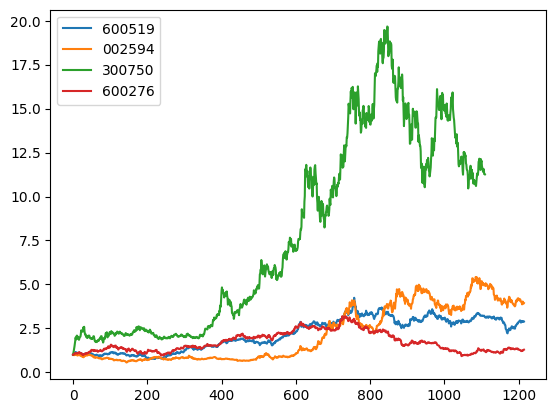

In [12]:
norm = new_df / new_df.iloc[0]
fig, ax = plt.subplots()
norm.plot(ax=ax)

对冲是金融学术语，指特意减低一项投资的投资。

它是一项能减低商业风险的同时仍然能在投资中获利的手法。

一般对冲是同时进行两笔行情相关、方法相反、数量相当、盈亏相抵的交易。

行情相关是指影响两种商品价格行情的市场供求关系存在统一性，
若供求关系若发生变化，同时会影响两种商品的价格，且价格变化的方向大体一致。

方向相反指两笔交易的买卖方向相反，这样无论价格向什么方向变化，总是一盈一亏。

当然要做到盈亏相抵，两笔交易的数量大小需根据各自价格变动的幅度来确定， 大体做到数量相当。

《量化投资--策略与技术》丁鹏的一书中，将对冲分为四种类型，分别为
- 股指期货对冲
- 商品期货对冲
- 统计套利
- 期权套利


In [16]:
def evaluate_split(data, portfolio):
    eval_set = ((data/data.iloc[0]) * portfolio).sum(axis=1)
    
    cagr = (eval_set.iloc[-1]/eval_set.iloc[0])**(1/10)-1

    rolling_max = eval_set.cummax()
    daily_dropdown = eval_set / rolling_max -1
    dropdown = daily_dropdown.cummin().iloc[-1]

    log_returns = np.log(eval_set/eval_set.shift())
    volatility = log_returns.std() * (255**.5)

    return cagr, dropdown, volatility

In [17]:
evaluate_split(new_df, [1/4] * 4)

(0.0733237303704386, -0.7528091902664916, 0.4813819999342854)

In [18]:
evaluate_split(new_df, [1, 0, 0, 0])

(0.11180686038570942, -0.47674262840212445, 0.3568327596122333)

In [19]:
evaluate_split(new_df, [0, 1, 0, 0])

(0.14701776512078446, -0.46230121608980357, 0.4760700148130877)

In [28]:
# error: divide zero
evaluate_split(new_df, [0, 0, 1, 0])

/usr/local/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-1.0, -1.0, nan)

In [21]:
evaluate_split(new_df, [0, 0, 0, 1])

(0.025682113479239765, -0.7112344257145848, 0.37015954986250155)

## 如何分配仓位？
回归，beta， CAPM

CAPM（资本资产定价模型）大概是资产定价中使用最广泛的模型， 它的之所以如此流行有一下几个原因。

作为单因素线性模型，无论是理解还是实现都非常简单。

只要下载上市公司的历史价格数据和市场指数数据，先计算收益，然后估算股票的市场风险。

这个最简单的单因子资产定价模型可以作为其他更复杂的定价模型（例如 Fama-French 3因子模型）的基础。

接下来，我们将简要介绍CAPM模型，然后利用yfinance的数据作为样例，介绍beta的估计和调整方法。

CAPM简要介绍

马科维茨(Markowitz，1952)的分散投资与效率组合投资理论第一次以严谨的数理工具为手段向人们展示了一个风险厌恶的投资者在众多风险资产中如何构建最优资产组合的方法。

CAPM阐述了在投资者都采用马科维茨的理论进行投资管理的条件下市场均衡状态的形成，

其核心在于资产的预期收益与预期风险具有正相关关系。

具体而言，根据资本资产定价模型，对于一个给定的资产ii，它的期望收益率和市场投资组合的期望收益率之间的关系可以表示为：

E(R_i) = R_f + B_i(E(R_m)-R_f)    （1）

其中，

E(R_i) –资产ii的期望收益率；

R_f –无风险收益率，通常以短期国债的利率来近似替代；

B_i – 资产ii的Beta（系统性风险）系数；

E(R_m) – 市场期望回报率 (Expected Market Return)。

实际上，如果我们去掉公式的期望 (1)，则可以得到：

R_i - R_f = a + B_i(R_m-R_f)

其中的 a 就代表资产 i 本身的超额收益。

毫无疑问，CAPM中，Beta 系数是至关重要的：

B_i = Cov(R_i, R_m) / Var(R_m) . (2)

从公式(1)和(2)可以发现，Beta 系数的含义为，市场风险溢价每提高1%,资产的收益率提高 B%，

所以Beta系数越大，则该资产相对市场的波动性也越大。

CAPM计算示例

数据获取

我们以苹果公司在2014年1月1日~2018年12月31日期间的股票作为研究对象，

首先读取相关数据，包括个股（AAPL）和市场（^GSPC， Yahoo Finance中标普500的代码）：

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_datareader.data as pddata
import altair as alt
import statsmodels.api as sm

plt.style.use('ggplot')
mpl.rcParams['figure.figsize']= [15, 9]

In [ ]:
beg_date = '2014-01-01'
end_date = '2018-12-31'

ticker = 'AAPL'
stock_apple = pddata.DataReader(name=ticker, data_source='yahoo',
                              start=beg_date, end=end_date,
                              retry_count=3, pause=0.1,
                              session=None, access_key=None)
return_apple = stock_apple['Adj Close'] / stock_apple['Adj Close'].shift(1) - 1
return_apple.dropna(inplace=True)
return_apple = return_apple.to_frame()
return_apple.columns = ['ret']

ticker = '^GSPC'
sp500 = pddata.DataReader(name=ticker, data_source='yahoo',
                         start=beg_date, end=end_date,
                         retry_count=3, pause=0.1,
                         session=None, access_key=None)
return_market = sp500['Adj Close'] / sp500['Adj Close'].shift(1) - 1
return_market.dropna(inplace=True)
return_market = return_market.to_frame()
return_market.columns = ['ret']
sp500.head()

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_apple.index, stock_apple['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SP500 Index', color=color)  # we already handled the x-label with ax1
ax2.plot(sp500.index, sp500['Adj Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
fig, ax = plt.subplots()

color = 'tab:red'
ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.plot(return_apple.index, return_apple.ret, label='AAPL Return')
ax.plot(return_market.index, return_market.ret, label='Market Return')
ax.legend()
plt.show()

估计Beta系数

从前面的分析可以知道，Beta系数就是线性回归的一个参数（斜率），所以通过线性回归就可以得到。

在python中至少有三种方法可以进行闲心回归的参数估计。

scipy包的linregress方法

In [ ]:
results = stats.linregress(return_market['ret'], return_apple['ret'])
print(results)

# LinregressResult(slope=1.1272452267207456, intercept=0.00046898978447086414, rvalue=0.620220452518429, pvalue=1.311085503675735e-134, stderr=0.040228176150808315)

numpy的polyfit方法

In [ ]:
np.polyfit(return_market['ret'],return_apple['ret'],deg=1)

# array([1.12724523e+00, 4.68989784e-04])

statsmodel的OLS方法

In [ ]:
x = sm.add_constant(return_market['ret'])
ols_results = sm.OLS(return_apple['ret'], x).fit()
print(ols_results.summary())

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     785.2
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          1.31e-134
Time:                        10:37:47   Log-Likelihood:                 3792.1
No. Observations:                1258   AIC:                            -7580.
Df Residuals:                    1256   BIC:                            -7570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.399      0.162      -0.000       0.001
ret            1.1272      0.040     28.021      0.000       1.048       1.206
==============================================================================
Omnibus:                      210.950   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3549.752
Skew:                           0.158   Prob(JB):                         0.00
Kurtosis:                      11.223   Cond. No.                         120.
==============================================================================
```

In [ ]:
plt.plot(return_market['ret'], return_apple['ret'], '.')
x = np.linspace(-0.05, 0.05, 100)
y = results.slope * x + results.intercept
plt.plot(x, y)
plt.show()

可以看到，三种方法计算的Beta参数是一样的：1.1272。

但是，需要注意的是，我们并没有用到公式(1)(1)中的无风险利率R_f，

但是实际上如果R_f
​
是常数的话，并不需要用到R_f
​
（可以从公式(2)(2)看出）。当然如果以美国国债利率作为无风险利率的话，
那么可能需要用到其他模型了（例如Fama-French三因子模型）。



滑窗Beta

有时，我们需要根据滑动窗口，例如三年的窗口，生成beta时间序列。 

例如，我们可以估计苹果公司股票的年度Beta：

In [ ]:
def ret_f(ticker, beg_date, end_date):
    p = pddata.DataReader(name=ticker, data_source='yahoo',
                              start=beg_date, end=end_date,
                              retry_count=3, pause=0.1,
                              session=None, access_key=None)
    ret = p / p.shift(1)
    return ret.dropna()

In [ ]:
years = return_apple.index.strftime('%Y').unique()
for year in years:
    y = return_apple[year]
    x = return_market[year]
    (beta,alpha,r_value,p_value,std_err) = stats.linregress(x.ret, y.ret)
    alpha = round(alpha, 6)
    beta = round(beta, 4)
    r_value = round(r_value, 4)
    p_value = round(p_value, 4)
    print(year, alpha, beta, r_value, p_value)

```
2014 0.001338 0.869 0.4437 0.0
2015 -1e-06 1.1458 0.6639 0.0
2016 0.000176 1.0086 0.5659 0.0
2017 0.00066 1.3641 0.518 0.0
2018 0.000193 1.2565 0.7454 0.0
```

Beta系数的修正

许多研究者发现，Beta系数存在“均值回归”的趋势，

也就是说，如果当期的beta值小于1，则下一期的beta值可能会变大，反之亦然。

对此，可以采用一种简单的方式对beta进行调整：

B_adj3 = (2/3) * B + (1/3) * 1.0

Scholes-William修正Beta

股票交易不活络或过热时，单因子模型所估计的系统风险即beta值会产生偏误：

当股票交易比市场交易平均水平活跃时，所求出之β估计值向上偏误（biased upward），

反之，则β估计值向下偏误（biased downward）。

因此，针对市场上一些交易较不活跃的股票，Dimson(1979)及Scholes and Williams (1977)各提出修正方法：

Scholes-Williams的修正β计算方法为利用个股报酬率分别对落后1期市场报酬率、当期市场报酬率及领先1期市场报酬率作简单回归分析求出各系数,将其相加，再除以(1+2P_m)，其中 P_m 为市场收益率的一阶序列相关系数：

B = (B**(-1) + B**(0) + B**(1)) / (1+2Pm)

其中，三个beta的计算如下：

R_t = a + b**(-1) * R_(m, t-1) + E_t

R_t = a + b**(0) * R_(m, t) + E_t

R_t = a + b**(+1) * R_(m, t+1) + E_t

In [ ]:
results = stats.linregress(return_market.ret, return_apple.ret)
beta_current = results.slope
results = stats.linregress(return_market.ret[:-1], return_apple.ret[1:])
beta_lag = results.slope
results = stats.linregress(return_market.ret[1:],return_apple.ret[:-1])
beta_forward = results.slope
print(beta_lag, beta_current, beta_forward)

rho_market = return_market.ret.autocorr(lag=1)
print(rho_market)

adjusted_beta = (beta_current + beta_lag + beta_forward) / (1+2*rho_market)
print(adjusted_beta)

```
-0.045779304294165386 1.1272452267207456 0.0448843577857814
-0.009859925937180204
1.1490085587941545
```

In [ ]:
results = stats.linregress(return_apple.ret, return_market.ret)
print(results)

```
LinregressResult(slope=0.3412508659195776, intercept=1.0421565455574495e-05, rvalue=0.620220452518429, pvalue=1.311085503675735e-134, stderr=0.012178272855290141)
```

小结

本文简单介绍了金融中基础性的 CAPM 模型以及 Beta 系数的估计和调整方法，

作为一种单因子模型，CAPM以其易用性得到了广泛认可，

但是从Beta系数的调整我们也可以发现，单因子模型在许多情况下还有着相当的局限性，

所以多因子模型也就自然而然地出现了。